## Homework 3

### Due by 11:59pm on 30 November ( submit within Portfolio )

Pick 10 of the following instructions and try to implement them on your dataset and show your code and execution within the Jupyter Notebook.

For HW3 we will be using multiple Python Data Science packages. Follow the instructions and try to duplicate the examples provided within the instruction.

#### For each instruction, try to run the example on your dataset.  If you cannot run the example on your dataset, then use the Iris, Boston, Digits, Wine, etc. Data set.

Once complete, upload your results to Github and update the Assignment 3 link within your portfolio's.

### Concatenating
Instruction 1: Provide an example of concatenating multiple feature extraction methods using your dataset.

In many real-world examples, there are many ways to extract features from a dataset. Often it is beneficial to combine several methods to obtain good performance. This example shows how to use FeatureUnion to combine features obtained by PCA and univariate selection.
Combining features using this transformer has the benefit that it allows cross validation and grid searches over the whole process.
The combination used in this example is not particularly helpful on this dataset and is only used to illustrate the usage of FeatureUnion.

Example file located in: auto_examples_jupyter/plot_feature_stacker.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/plot_feature_stacker.ipynb

In [1]:
%matplotlib inline

In [2]:

# Author: Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 clause

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import pandas as pd
import numpy as np
import csv

df = []
with open('auto-mpg.data') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        line_count+=1
        count = 0
        for i in row[0].split():
            if count < 8:
                df.append(float(i))
                count+=1
df = np.array(df)
df = df.reshape((line_count,-1))

X, y = df[:,0:4], df[:,7]


# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.75, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.7099236641221374, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.6821705426356589, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.75, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.7099236641221374, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.6821705426356589, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.75, total=   1.2s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.7175572519083969, total=   0.8s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.4s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.6821705426356589, total=   0.5s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.75, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.7099236641221374, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.689922480620155, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.9s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.75, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.7175572519083969, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.6666666666666666, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=10, score=0.7424242424242424, total=   1.1s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=10, score=0.7175572519083969, total=   0.4s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2,

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   17.7s finished


### Applications - Boston Housing Dataset
Instruction 2: Provide an example of Outlier detection on your dataset.

This example illustrates the need for robust covariance estimation on a real data set. It is useful both for outlier detection and for a better understanding of the data structure.
We selected two sets of two variables from the Boston housing data set as an illustration of what kind of analysis can be done with several outlier detection tools. For the purpose of visualization, we are working with two-dimensional examples, but one should be aware that things are not so trivial in high-dimension, as it will be pointed out.
In both examples below, the main result is that the empirical covariance estimate, as a non-robust one, is highly influenced by the heterogeneous structure of the observations. Although the robust covariance estimate is able to focus on the main mode of the data distribution, it sticks to the assumption that the data should be Gaussian distributed, yielding some biased estimation of the data structure, but yet accurate to some extent. The One-Class SVM does not assume any parametric form of the data distribution and can therefore model the complex shape of the data much better.

Example file located in: auto_examples_jupyter/applications/plot_outlier_detection_housing.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/applications/plot_outlier_detection_housing.ipynb

Automatically created module for IPython interactive environment


/Users/chris/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


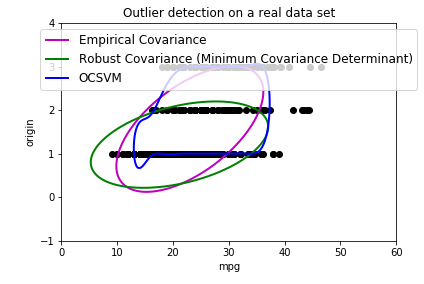

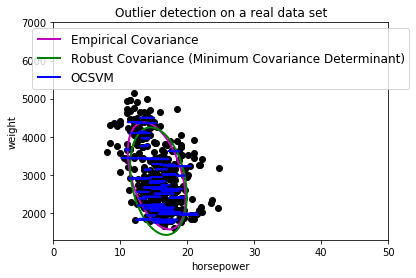

In [3]:
print(__doc__)

# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

# Get data
#X1 = load_boston()['data'][:, [8, 10]]  # two clusters
#X2 = load_boston()['data'][:, [5, 12]]  # "banana"-shaped
X1 = df[:, [0, 7]]  # two clusters
X2 = df[:, [5, 4]]  # "banana"-shaped
#print(f'{X1.min()},{X1.max()},{X2.min()},{X2.max()}')

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 60, 500), np.linspace(-1, 4, 500))
xx2, yy2 = np.meshgrid(np.linspace(0, 50, 500), np.linspace(1300, 7000, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("origin")
plt.xlabel("mpg")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("weight")
plt.xlabel("horsepower")

plt.show()

### Classification Comparison and Probability
Instruction 3: Provide an example of Classifier Comparison using your dataset

A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.
Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.
The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

Plot the classification probability for different classifiers. We use a 3 class dataset, and we classify it with a Support Vector classifier, L1 and L2 penalized logistic regression with either a One-Vs-Rest or multinomial setting, and Gaussian process classification.
The logistic regression is not a multiclass classifier out of the box. As a result it can identify only the first class.

Example file located in:
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/classification/plot_lda_qda.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/Classification/plot_classifier_comparison.ipynb

Automatically created module for IPython interactive environment


/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/chris/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/chris/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
/Users/chris/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users

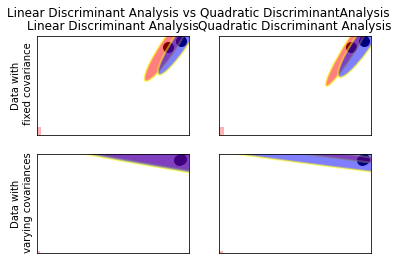

In [4]:
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets


def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    #n, dim = 300, 2
    #np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(df[:,[1,2]]/df[:,[1,2]].mean(), C),
              np.dot(df[:,[1,2]]/df[:,[1,2]].mean(), C) + np.array([1, 1])]
    y = np.hstack((df[:,0].astype(str), df[:,0].astype(str)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    #n, dim = 300, 2
    #np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(df[:,[3,4]]/df[:,[3,4]].mean(), C),
              np.dot(df[:,[3,4]]/df[:,[3,4]].mean(), C.T) + np.array([1, 4])]
    y = np.hstack((df[:,0].astype(str), df[:,0].astype(str)))
    return X, y

# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant'
             'Analysis')
plt.show()

### Covariance Estimation
Instruction 4: Provide an example of Outlier detection with covariance estimation using your dataset.

When the amount of contamination is known, this example illustrates three different ways of performing Novelty and Outlier Detection:
•	based on a robust estimator of covariance, which is assuming that the data are Gaussian distributed and performs better than the One-Class SVM in that case.
•	using the One-Class SVM and its ability to capture the shape of the data set, hence performing better when the data is strongly non-Gaussian, i.e. with two well-separated clusters;
•	using the Isolation Forest algorithm, which is based on random forests and hence more adapted to large-dimensional settings, even if it performs quite well in the examples below.
•	using the Local Outlier Factor to measure the local deviation of a given data point with respect to its neighbors by comparing their local density.
The ground truth about inliers and outliers is given by the points colors while the orange-filled area indicates which points are reported as inliers by each method.
Here, we assume that we know the fraction of outliers in the datasets.

Example file located in: auto_examples_jupyter/Covariance/plot_outlier_detection.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/covariance/plot_outlier_detection.ipynb

/Users/chris/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/chris/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Automatically created module for IPython interactive environment


/Users/chris/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chris/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chris/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

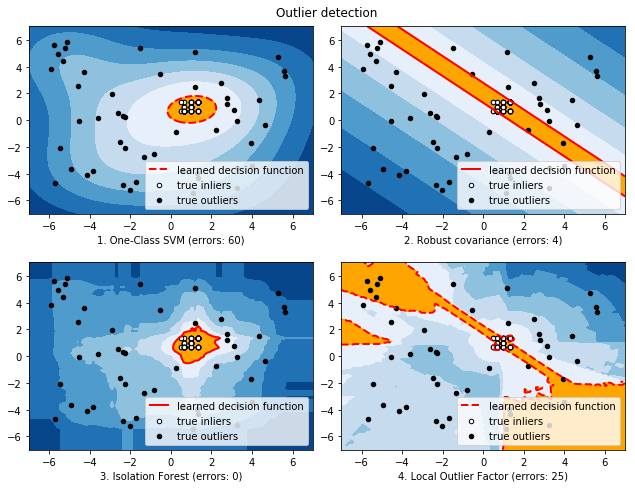

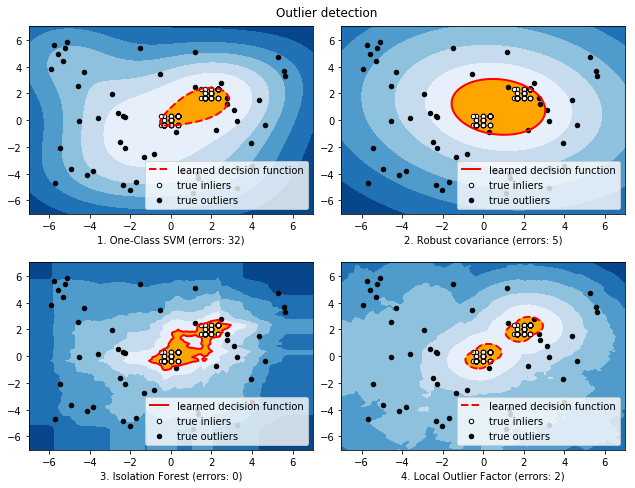

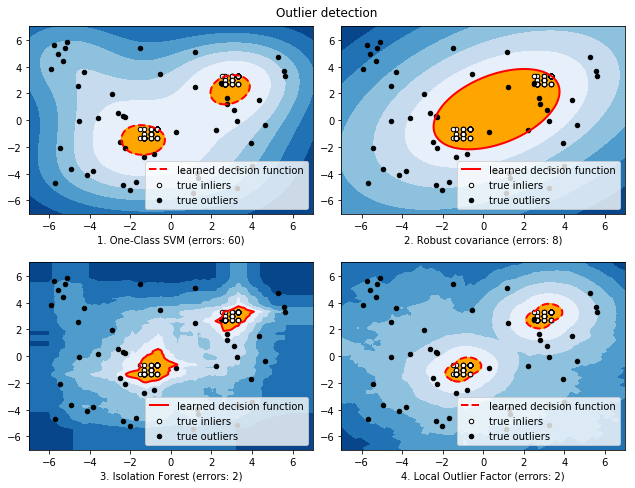

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

rng = np.random.RandomState(42)

# Example settings
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=35,
        contamination=outliers_fraction)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = df[:n_inliers,1]/df[:n_inliers,1].mean() - offset
    X2 = df[:n_inliers,1]/df[:n_inliers,1].mean() + offset
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    X = X.reshape(-1,2)
    #print(np.shape(X))
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    #print(np.shape(X))
    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        if clf_name == "Local Outlier Factor":
            # decision_function is private for LOF
            Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")

plt.show()

### Cross decomposition
Instruction 5: Provide a comparison of cross decomposition methods using your dataset

Simple usage of various cross decomposition algorithms: - PLSCanonical - PLSRegression, with multivariate response, a.k.a. PLS2 - PLSRegression, with univariate response, a.k.a. PLS1 - CCA
Given 2 multivariate covarying two-dimensional datasets, X, and Y, PLS extracts the ‘directions of covariance’, i.e. the components of each datasets that explain the most shared variance between both datasets. This is apparent on the scatterplot matrix display: components 1 in dataset X and dataset Y are maximally correlated (points lie around the first diagonal). This is also true for components 2 in both dataset, however, the correlation across datasets for different components is weak: the point cloud is very spherical.

Example file located in: auto_examples_jupyter/cross_decomposition/plot_compare_cross_decomposition.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/cross_decomposition/plot_compare_cross_decomposition.ipynb

Automatically created module for IPython interactive environment
Corr(X)
[[ 1.   -0.78 -0.81 -0.78]
 [-0.78  1.    0.95  0.84]
 [-0.81  0.95  1.    0.9 ]
 [-0.78  0.84  0.9   1.  ]]
Corr(Y)
[[ 1.   -0.42 -0.31 -0.59]
 [-0.42  1.    0.29  0.21]
 [-0.31  0.29  1.    0.18]
 [-0.59  0.21  0.18  1.  ]]


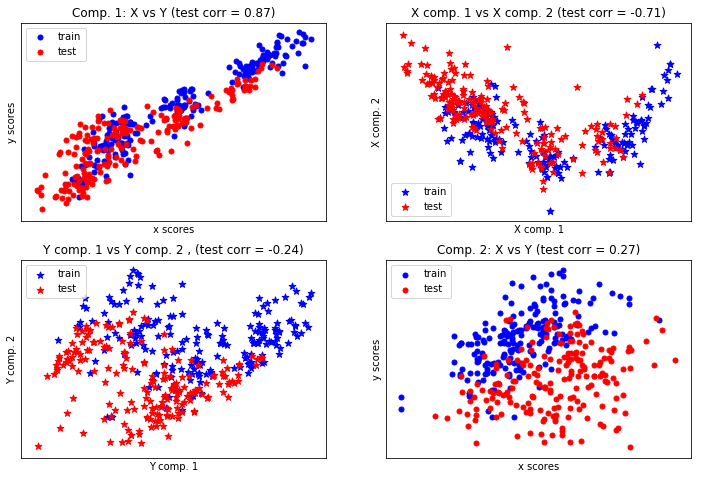

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   1.   1. ]
 [ 1.9  1.9  2. ]
 [-0.  -0.  -0.1]
 [ 0.   0.  -0. ]
 [-0.  -0.   0. ]
 [-0.  -0.  -0. ]
 [-0.  -0.  -0. ]
 [ 0.   0.  -0. ]
 [-0.  -0.  -0. ]
 [-0.  -0.  -0.1]]
Estimated betas
[[ 1. ]
 [ 2. ]
 [ 0. ]
 [ 0. ]
 [ 0.1]
 [-0. ]
 [-0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]


In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

# #############################################################################
# Dataset based latent variables model

n = len(df[:,0])
# 2 latents vars:
#l1 = np.random.normal(size=n)
#l2 = np.random.normal(size=n)

#latents = np.array([l1, l1, l2, l2]).T
#X = latents + np.random.normal(size=4 * n).reshape((n, 4))
#Y = latents + np.random.normal(size=4 * n).reshape((n, 4))
X = df[:,[0,1,2,3]]
Y = df[:,[4,5,6,7]]

X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]


print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

# #############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

# #############################################################################
# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

# PLS regression, with univariate response, a.k.a. PLS1

n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)
# note that the number of components exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

# #############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

### Decomposition - Iris Dataset
Instruction 6: Provide an example of PCA using your dataset

Principal Component Analysis applied to the Iris dataset.

Example file located in: auto_examples_jupyter/decomposition/plot_pca_iris.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/decomposition/plot_pca_iris.ipynb

Automatically created module for IPython interactive environment


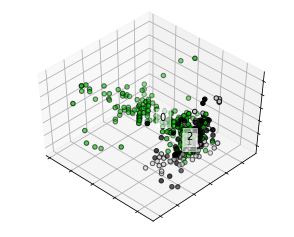

In [7]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
X = df[:,[0,1,2,3]]
y = df[:,[7]].astype(int)
y = y-1
y = y.reshape(392,)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [(0, 0), (1, 1), (2, 2)]:
    ax.text3D(X[y == label,0].mean(),
              X[y == label,1].mean(),
              X[y == label,2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results

y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

### LDA and PCA - Iris Dataset
Instruction 7: Provide an example of a Comparison of LDA and PCA 2D projection of your dataset

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.
Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.
Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

Example file located in: auto_examples_jupyter/decomposition/plot_pca_vs_lda.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/decomposition/plot_pca_vs_lda.ipynb


Automatically created module for IPython interactive environment
explained variance ratio (first two components): [0.97751665 0.02083323]


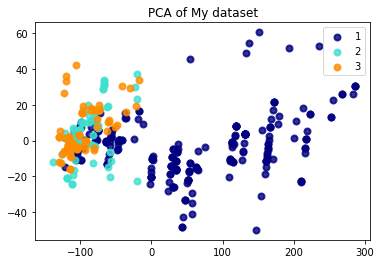

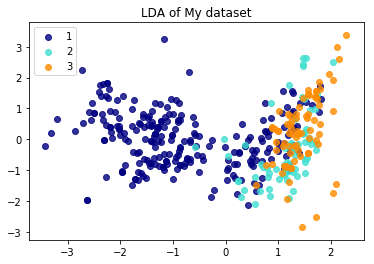

In [8]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

#X = iris.data
#y = iris.target
#target_names = iris.target_names
X = df[:,[0,1,2,3]]
y = df[:,[7]].astype(int)
y = y-1
y = y.reshape(392,)
target_names = [1,2,3]


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of My dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of My dataset')

plt.show()

### Ensemble methods - Iris Dataset
Instruction 8: Provide an example of Plotting the decision surfaces of ensembles of trees using your dataset

Plot the decision surfaces of forests of randomized trees trained on pairs of features of the iris dataset.

Example file located in: auto_examples_jupyter/ensemble/plot_forest_iris.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/ensemble/plot_forest_iris.ipynb

Automatically created module for IPython interactive environment
DecisionTree with features [0, 1] has a score of 0.8316326530612245
RandomForest with 30 estimators with features [0, 1] has a score of 0.8316326530612245
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.8316326530612245
AdaBoost with 30 estimators with features [0, 1] has a score of 0.8112244897959183
DecisionTree with features [0, 2] has a score of 0.9846938775510204
RandomForest with 30 estimators with features [0, 2] has a score of 0.9846938775510204
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9846938775510204
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9285714285714286
DecisionTree with features [2, 3] has a score of 0.9821428571428571
RandomForest with 30 estimators with features [2, 3] has a score of 0.9821428571428571
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9821428571428571
AdaBoost with 30 estimators with features [2, 3] 

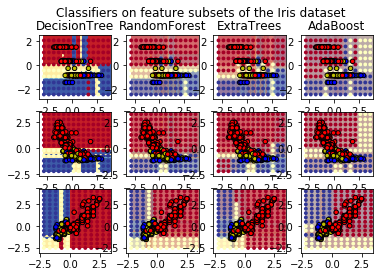

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
#iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]
Xp = df[:,[0,1,2,3]]
yp = df[:,[7]].astype(int)
yp = yp.reshape(392,)

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = Xp[:, pair]
        y = yp

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

### Support Vector Machine - Part 1 - Iris Dataset
Instruction 9: Provide an example of SVM using your dataset

A tutorial exercise for using different SVM kernels.
This exercise is used in the Using kernels part of the Supervised learning: predicting an output variable from high-dimensional observations section of the A tutorial on statistical-learning for scientific data processing.

 Dataset Exercise
A tutorial exercise using Cross-validation with an SVM on the Digits dataset.

Example file located in: auto_examples_jupyter/exercises/plot_cv_digits.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/exercises/plot_iris_exercise.ipynb

Automatically created module for IPython interactive environment


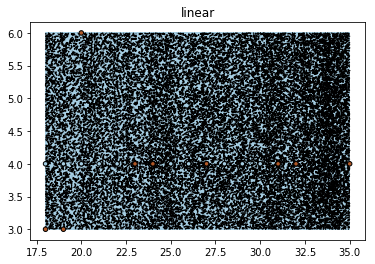

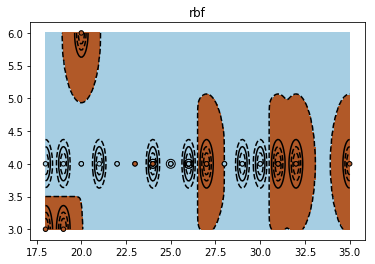

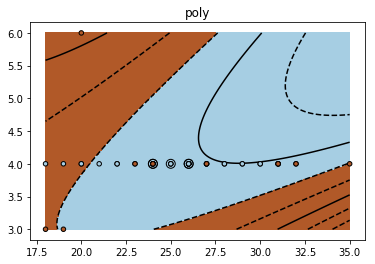

In [10]:
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

X = df[:150,[0,1,5,6]]
y = df[:150,7].astype(int)
y = y-1
y = y.reshape(150,)
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'])

    plt.title(kernel)
plt.show()

### Feature Selection - Boston Dataset
Instruction 10: Provide an example of Feature selection using SelectFromModel and LassoCV using your dataset

Use SelectFromModel meta-transformer along with Lasso to select the best couple of features from the Boston dataset.
plot_select_from_model_boston.ipynb

Example file located in: auto_examples_jupyter/feature_selection/plot_select_from_model_boston.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/feature_selection/plot_select_from_model_boston.ipynb


Automatically created module for IPython interactive environment


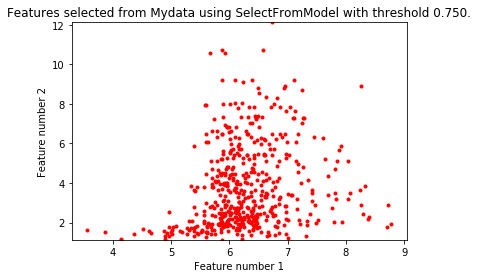

In [11]:
# Author: Manoj Kumar <mks542@nyu.edu>
# License: BSD 3 clause

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
boston = load_boston()
X, y = boston['data'], boston['target']
#X = df
#y = df[:,7].astype(int)

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Mydata using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

### Univariate Feature Selection - Iris Dataset
Instruction 11: Provide an example of Univariate Feature Selection using your dataset.

An example showing univariate feature selection.
Noisy (non informative) features are added to the iris data and univariate feature selection is applied. For each feature, we plot the p-values for the univariate feature selection and the corresponding weights of an SVM. We can see that univariate feature selection selects the informative features and that these have larger SVM weights.
In the total set of features, only the 4 first ones are significant. We can see that they have the highest score with univariate feature selection. The SVM assigns a large weight to one of these features, but also Selects many of the non-informative features. Applying univariate feature selection before the SVM increases the SVM weight attributed to the significant features, and will thus improve classification

Example file located in: auto_examples_jupyter/feature_selection/plot_feature_selection.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/feature_selection/plot_feature_selection.ipynb

Automatically created module for IPython interactive environment


/Users/chris/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


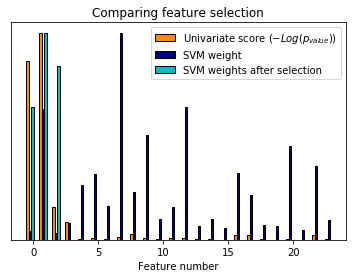

In [12]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
#iris = datasets.load_iris()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(df[:,0]), 20))


X = df[:,[0,1,5,6]]
y = df[:,7].astype(int)
y = y.reshape(len(df[:,7]),)

# Add the noisy data to the informative features
X = np.hstack((X, E))
#y = iris.target



plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

### Gaussian Process for Machine Learning - Iris Dataset
Instruction 12: Provide an example of Gaussian process classification (GPC) on your dataset

This example illustrates the predicted probability of GPC for an isotropic and anisotropic RBF kernel on a two-dimensional version for the iris-dataset. The anisotropic RBF kernel obtains slightly higher log-marginal-likelihood by assigning different length-scales to the two feature dimensions.

Example file located in:
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/gaussian_process/plot_gpc_iris.ipynb

Automatically created module for IPython interactive environment


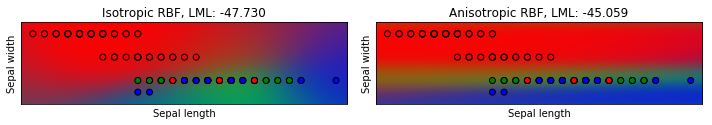

In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features.
#y = np.array(iris.target, dtype=int)

X = df[:150,[0,1]]
y = df[:150,7].astype(int)
y = y-1
y = y.reshape(len(df[:150,7]),)

h = .02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
                edgecolors=(0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()

### Generalized Linear Models - Iris Dataset
Instruction 13: Provide an example of Plotting multi-class SGD on your dataset

Plot decision surface of multi-class SGD on iris dataset. The hyperplanes corresponding to the three one-versus-all (OVA) classifiers are represented by the dashed lines.
plot_sgd_iris.ipynb
Logistic Regression 3-class Classifier
Show below is a logistic-regression classifiers decision boundaries on the iris <https://en.wikipedia.org/wiki/Iris_flower_data_set>_ dataset. The datapoints are colored according to their labels.

Example file located in:
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/linear_model/plot_iris_logistic.ipynb

Automatically created module for IPython interactive environment


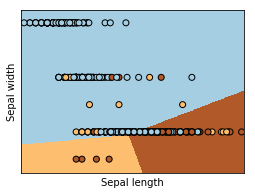

In [14]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features.
#Y = iris.target
X = df[:,[0,1]]
Y = df[:,7].astype(int)
Y = Y-1

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Model Selection
Instruction 14: Provide an example of Underfitting vs. Overfitting using your dataset

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

Example file located in: auto_examples_jupyter/model_selection/plot_underfitting_overfitting.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/model_selection/plot_underfitting_overfitting.ipynb

Automatically created module for IPython interactive environment


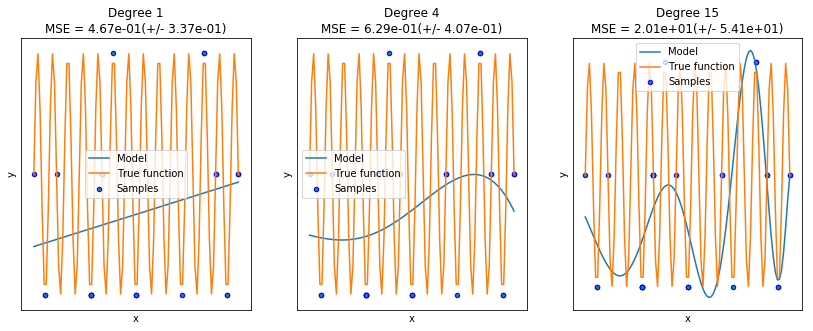

In [15]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

#X = np.sort(np.random.rand(n_samples))
#y = true_fun(X) + np.random.randn(n_samples) * 0.1
X = np.sort(df[:30,0])
y = true_fun(X)

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(min(X), max(X), 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.xlim((0, 1))
    #plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### Nearest Neighbors
Instruction 15: Provide an example of Nearest Neighbors Classification using your dataset.

Sample usage of Nearest Neighbors classification. It will plot the decision boundaries for each class.

Example file located in: auto_examples_jupyter/neighbors/plot_classification.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/neighbors/plot_classification.ipynb

Automatically created module for IPython interactive environment


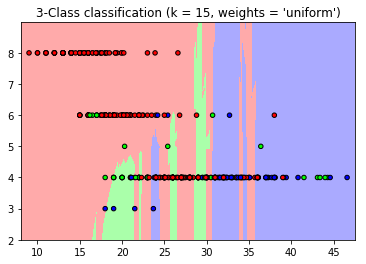

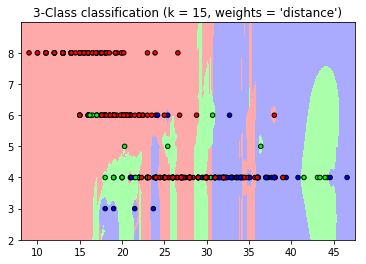

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target
X = df[:,[0,1]]
y = df[:,7].astype(int)
y = y-1

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### Neural Networks
Instruction 16: Provide an example of Varying regularization in Multi-layer Perceptron using your dataset

A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The plot shows that different alphas yield different decision functions.
Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

Example file located in: auto_examples_jupyter/neural_networks/plot_mlp_alpha.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/neural_networks/plot_mlp_alpha.ipynb


Automatically created module for IPython interactive environment


/Users/chris/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


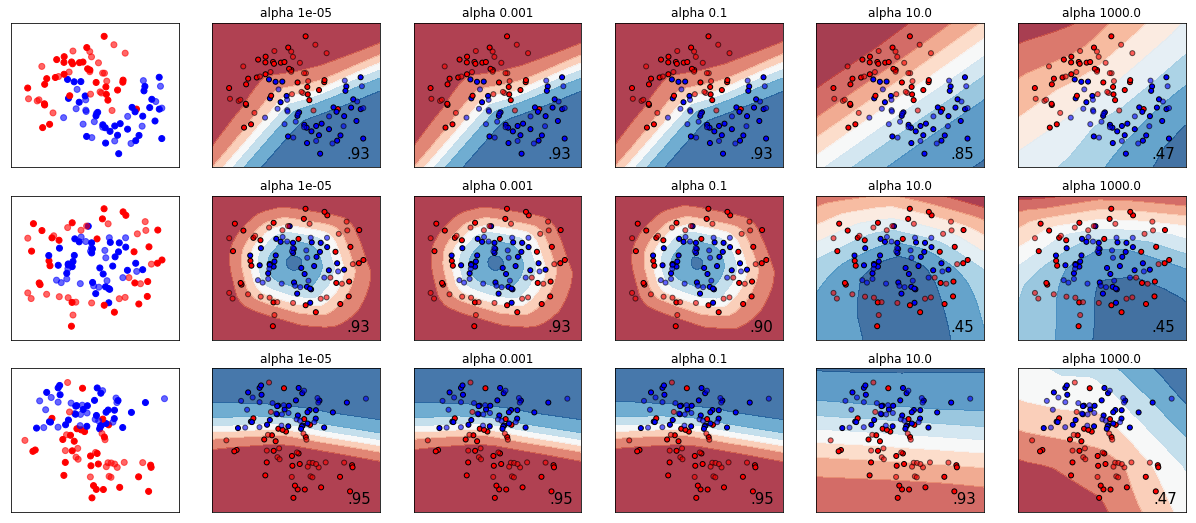

In [17]:
print(__doc__)


# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

### Preprocessing - Wine Dataset

Instruction 17: Provide an example of Importance of Feature Scaling using your dataset

Feature scaling though standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.
While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.
To illustrate this, PCA is performed comparing the use of data with StandardScaler applied, to unscaled data. The results are visualized and a clear difference noted. The 1st principal component in the unscaled set can be seen. It can be seen that feature #13 dominates the direction, being a whole two orders of magnitude above the other features. This is contrasted when observing the principal component for the scaled version of the data. In the scaled version, the orders of magnitude are roughly the same across all the features.
The dataset used is the Wine Dataset available at UCI. This dataset has continuous features that are heterogeneous in scale due to differing properties that they measure (i.e alcohol content, and malic acid).
The transformed data is then used to train a naive Bayes classifier, and a clear difference in prediction accuracies is observed wherein the dataset which is scaled before PCA vastly outperforms the unscaled version.

Example file located in: auto_examples_jupyter/preprocessing/plot_scaling_importance.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/preprocessing/plot_scaling_importance.ipynb

Automatically created module for IPython interactive environment

Prediction accuracy for the normal test dataset with PCA
61.86%


Prediction accuracy for the standardized test dataset with PCA
65.25%


PC 1 without scaling:
 [-0.00793269  0.00181783  0.11467162  0.03861205  0.99261743 -0.00141037
 -0.00139419]

PC 1 with scaling:
 [-0.39938638  0.41630397  0.42701578  0.42124555  0.4095256  -0.28703411
 -0.23935628]


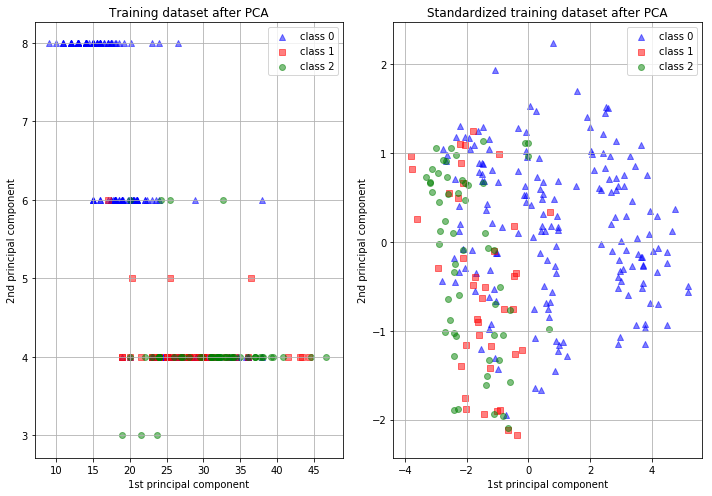

In [18]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)
features = df[:,:7]
target = df[:,7].astype(int)
target = target-1

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

### Semi Supervised Classification - Iris Dataset
Instruction 19: Provide an example of the decision boundary of label propagation versus SVM on your dataset

Comparison for decision boundary generated on iris dataset between Label Propagation and SVM.
This demonstrates Label Propagation learning a good boundary even with a small amount of labeled data.

Example file located in: auto_examples_jupyter/semi_supervised/plot_label_propagation_versus_svm_iris.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/semi_supervised/plot_label_propagation_versus_svm_iris.ipynb

Automatically created module for IPython interactive environment


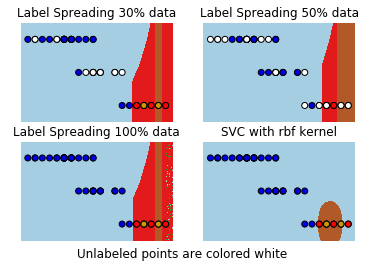

In [19]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

rng = np.random.RandomState(0)

#iris = datasets.load_iris()

#X = iris.data[:, :2]
#y = iris.target

X = df[:50,[0,1]]
y = df[:50,7].astype(int)
y = y-1

# step size in the mesh
h = .02

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X, y), y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

### Support Vector Machines - Part 2 - Iris Dataset
Instruction 20: Provide an example of Plot different SVM classifiers in your dataset
Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:
•	Sepal length
•	Sepal width
This example shows how to plot the decision surface for four SVM classifiers with different kernels.
The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:
•	LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
•	LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.
Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

Example file located in: auto_examples_jupyter/svm/plot_iris.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/svm/plot_iris.ipynb

Automatically created module for IPython interactive environment


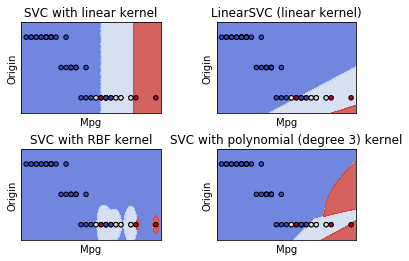

In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target
X = df[20:70,[0,1]]
y = df[20:70,7].astype(int)
y = y-1

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Mpg')
    ax.set_ylabel('Origin')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Decision Trees - Iris Dataset
Instruction 21: Provide an example of plotting the decision surface of a decision tree on your dataset

Plot the decision surface of a decision tree trained on pairs of features of the iris dataset.
See decision tree for more information on the estimator.
For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

Example file located in: auto_examples_jupyter/tree/plot_iris.ipynb
 - https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/tree/plot_iris.ipynb

Automatically created module for IPython interactive environment


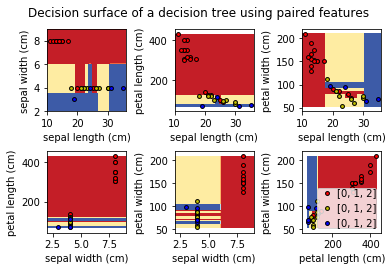

In [21]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
#iris = load_iris()

y = df[50:80,7].astype(int)
y = y-1

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = df[50:80, pair]
    y = y

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=[0,1,2],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()